In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame

In [2]:
from google.colab import files
uploaded = files.upload()

Saving crx.data to crx.data


In [3]:
df = pd.read_csv('/content/crx.data',header=None)
header_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
df = pd.read_csv('/content/crx.data',names=header_names)

In [4]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       690 non-null    object 
 1   B       690 non-null    object 
 2   C       690 non-null    float64
 3   D       690 non-null    object 
 4   E       690 non-null    object 
 5   F       690 non-null    object 
 6   G       690 non-null    object 
 7   H       690 non-null    float64
 8   I       690 non-null    object 
 9   J       690 non-null    object 
 10  K       690 non-null    int64  
 11  L       690 non-null    object 
 12  M       690 non-null    object 
 13  N       690 non-null    object 
 14  O       690 non-null    int64  
 15  P       690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [5]:
df.describe()

,C,H,K,O
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [6]:
for i in df.columns:
    print(i)
    if df[i].dtype==object:
        print(df[i].unique())

A
['b' 'a' '?']
B
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.

In [7]:
df = df.replace('?',np.nan)

In [8]:
df.isnull().sum()

A    12
B    12
C     0
D     6
E     6
F     9
G     9
H     0
I     0
J     0
K     0
L     0
M     0
N    13
O     0
P     0
dtype: int64

In [9]:
from sre_constants import error
def fix_miss_mean(df,col):
  ''' This function replaces the missing values of a column with mean value'''
  df[col]= pd.to_numeric(df[col], errors='coerce')
  df[col].fillna(df[col].mean(),inplace=True)
def fix_miss_ffill(df,col):
  ''' take data frame as input and replaces the missing values of a column with previous column value'''
  df[col]=df[col].fillna(method='ffill')
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [10]:
fix_miss_ffill(df,'A')
fix_miss_ffill(df,'B')
fix_miss_ffill(df,'D')
fix_miss_ffill(df,'E')
fix_miss_ffill(df,'F')
fix_miss_ffill(df,'G')
fix_miss_mean(df,'N')

In [11]:
#seperate target column from features columns
y=df['P']
features=df.drop(['P'],axis=1)
features.head(10)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442


In [12]:
object_col=['A','B','D','E','F','G','I','J','L','M','N']
x=features.copy()
ordinal_encoder=OrdinalEncoder()
x[object_col]= ordinal_encoder.fit_transform(features[object_col])
x.head(10)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1.0,156.0,0.000,1.0,0.0,12.0,7.0,1.250,1.0,1.0,1,0.0,0.0,69.0,0
1,0.0,328.0,4.460,1.0,0.0,10.0,3.0,3.040,1.0,1.0,6,0.0,0.0,11.0,560
2,0.0,89.0,0.500,1.0,0.0,10.0,3.0,1.500,1.0,0.0,0,0.0,0.0,97.0,824
3,1.0,125.0,1.540,1.0,0.0,12.0,7.0,3.750,1.0,1.0,5,1.0,0.0,31.0,3
4,1.0,43.0,5.625,1.0,0.0,12.0,7.0,1.710,1.0,0.0,0,0.0,2.0,37.0,0
5,1.0,168.0,4.000,1.0,0.0,9.0,7.0,2.500,1.0,0.0,0,1.0,0.0,116.0,0
6,1.0,179.0,1.040,1.0,0.0,11.0,3.0,6.500,1.0,0.0,0,1.0,0.0,54.0,31285
7,0.0,74.0,11.585,1.0,0.0,2.0,7.0,0.040,1.0,0.0,0,0.0,0.0,23.0,1349
8,1.0,310.0,0.500,2.0,2.0,8.0,3.0,3.960,1.0,0.0,0,0.0,0.0,62.0,314
9,1.0,255.0,4.915,2.0,2.0,12.0,7.0,3.165,1.0,0.0,0,1.0,0.0,15.0,1442


<ipython-input-13-7177bf98774c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='P',edgecolor="white",palette="viridis",order=df["P"].value_counts().index)


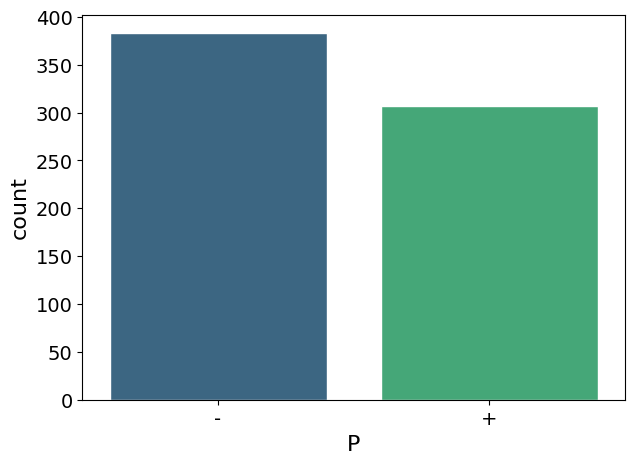

In [13]:
#lets visulaize the how many approved and declined applicants in dataset
fig, ax = plt.subplots(1, 1, figsize=(7,5), sharex=True)
sns.countplot(data=df, x='P',edgecolor="white",palette="viridis",order=df["P"].value_counts().index)
total = df['P'].value_counts().sum()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('P', fontsize=16)
plt.ylabel('count', fontsize=16)

plt.show()

In [14]:
xTrain,xTest,yTrain,yTest= train_test_split(x,y,test_size=0.30,random_state=2)


In [15]:
#importing the minmaxscaler and transforming in range of 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
rescaledxtrain=scaler.fit_transform(xTrain)
rescaledxtest=scaler.fit_transform(xTest)

from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(rescaledxtrain,yTrain)

LogisticRegression()

In [28]:
from sklearn.metrics import confusion_matrix
y_pred= logreg.predict(rescaledxtest)
y_pred1= logreg.predict(rescaledxtrain)

print("Test : Accuracy=", logreg.score(rescaledxtest,yTest))
print("Test : Accuracy=", logreg.score(rescaledxtrain, yTrain))

confusion_matrix(yTest,y_pred)


Test : Accuracy= 0.8792270531400966
Test : Accuracy= 0.855072463768116


array([[91, 11],
       [14, 91]])